# Starting off:

### In machine learning what is the difference between an  algorithm and a model?

- A model utilizes algorithms to perform their task






# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse (negative) of the second derivative of loss_function at x).

loss fuction = SUM((y_hat - y)^2)

y = B0 + B1x1 + B2x2 ...

Bn = fetaures

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

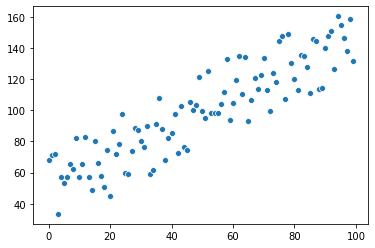

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 473.727813
Iteration 1 | Cost: 470.612962
Iteration 2 | Cost: 467.673123
Iteration 3 | Cost: 464.898143
Iteration 4 | Cost: 462.278453
Iteration 5 | Cost: 459.805045
Iteration 6 | Cost: 457.469429
Iteration 7 | Cost: 455.263611
Iteration 8 | Cost: 453.180059
Iteration 9 | Cost: 451.211679
Iteration 10 | Cost: 449.351788
Iteration 11 | Cost: 447.594092
Iteration 12 | Cost: 445.932662
Iteration 13 | Cost: 444.361911
Iteration 14 | Cost: 442.876580
Iteration 15 | Cost: 441.471712
Iteration 16 | Cost: 440.142640
Iteration 17 | Cost: 438.884966
Iteration 18 | Cost: 437.694548
Iteration 19 | Cost: 436.567485
Iteration 20 | Cost: 435.500100
Iteration 21 | Cost: 434.488934
Iteration 22 | Cost: 433.530724
Iteration 23 | Cost: 432.622399
Iteration 24 | Cost: 431.761065
Iteration 25 | Cost: 430.943998
Iteration 26 | Cost: 430.168629
Iteration 27 | Cost: 429.432540
Iteration 28 | Cost: 428.733453
Iteration 29 | Cost: 428.069223
Iteration 30 | Cost: 427.437829
Iteration 31 | Cos

Iteration 956 | Cost: 338.961727
Iteration 957 | Cost: 338.887108
Iteration 958 | Cost: 338.812511
Iteration 959 | Cost: 338.737937
Iteration 960 | Cost: 338.663386
Iteration 961 | Cost: 338.588858
Iteration 962 | Cost: 338.514352
Iteration 963 | Cost: 338.439869
Iteration 964 | Cost: 338.365408
Iteration 965 | Cost: 338.290970
Iteration 966 | Cost: 338.216555
Iteration 967 | Cost: 338.142162
Iteration 968 | Cost: 338.067793
Iteration 969 | Cost: 337.993445
Iteration 970 | Cost: 337.919121
Iteration 971 | Cost: 337.844819
Iteration 972 | Cost: 337.770539
Iteration 973 | Cost: 337.696283
Iteration 974 | Cost: 337.622048
Iteration 975 | Cost: 337.547837
Iteration 976 | Cost: 337.473648
Iteration 977 | Cost: 337.399482
Iteration 978 | Cost: 337.325338
Iteration 979 | Cost: 337.251217
Iteration 980 | Cost: 337.177118
Iteration 981 | Cost: 337.103042
Iteration 982 | Cost: 337.028988
Iteration 983 | Cost: 336.954957
Iteration 984 | Cost: 336.880949
Iteration 985 | Cost: 336.806963
Iteration 

Iteration 1844 | Cost: 280.893099
Iteration 1845 | Cost: 280.836157
Iteration 1846 | Cost: 280.779233
Iteration 1847 | Cost: 280.722326
Iteration 1848 | Cost: 280.665437
Iteration 1849 | Cost: 280.608564
Iteration 1850 | Cost: 280.551710
Iteration 1851 | Cost: 280.494872
Iteration 1852 | Cost: 280.438052
Iteration 1853 | Cost: 280.381249
Iteration 1854 | Cost: 280.324463
Iteration 1855 | Cost: 280.267694
Iteration 1856 | Cost: 280.210943
Iteration 1857 | Cost: 280.154209
Iteration 1858 | Cost: 280.097493
Iteration 1859 | Cost: 280.040793
Iteration 1860 | Cost: 279.984111
Iteration 1861 | Cost: 279.927447
Iteration 1862 | Cost: 279.870799
Iteration 1863 | Cost: 279.814169
Iteration 1864 | Cost: 279.757556
Iteration 1865 | Cost: 279.700960
Iteration 1866 | Cost: 279.644381
Iteration 1867 | Cost: 279.587820
Iteration 1868 | Cost: 279.531276
Iteration 1869 | Cost: 279.474749
Iteration 1870 | Cost: 279.418239
Iteration 1871 | Cost: 279.361746
Iteration 1872 | Cost: 279.305271
Iteration 1873

Iteration 2455 | Cost: 249.141499
Iteration 2456 | Cost: 249.094224
Iteration 2457 | Cost: 249.046963
Iteration 2458 | Cost: 248.999716
Iteration 2459 | Cost: 248.952484
Iteration 2460 | Cost: 248.905266
Iteration 2461 | Cost: 248.858063
Iteration 2462 | Cost: 248.810873
Iteration 2463 | Cost: 248.763699
Iteration 2464 | Cost: 248.716538
Iteration 2465 | Cost: 248.669392
Iteration 2466 | Cost: 248.622261
Iteration 2467 | Cost: 248.575143
Iteration 2468 | Cost: 248.528040
Iteration 2469 | Cost: 248.480952
Iteration 2470 | Cost: 248.433877
Iteration 2471 | Cost: 248.386817
Iteration 2472 | Cost: 248.339772
Iteration 2473 | Cost: 248.292740
Iteration 2474 | Cost: 248.245723
Iteration 2475 | Cost: 248.198721
Iteration 2476 | Cost: 248.151732
Iteration 2477 | Cost: 248.104758
Iteration 2478 | Cost: 248.057799
Iteration 2479 | Cost: 248.010853
Iteration 2480 | Cost: 247.963922
Iteration 2481 | Cost: 247.917005
Iteration 2482 | Cost: 247.870102
Iteration 2483 | Cost: 247.823214
Iteration 2484

Iteration 3454 | Cost: 208.413830
Iteration 3455 | Cost: 208.378953
Iteration 3456 | Cost: 208.344087
Iteration 3457 | Cost: 208.309231
Iteration 3458 | Cost: 208.274387
Iteration 3459 | Cost: 208.239552
Iteration 3460 | Cost: 208.204729
Iteration 3461 | Cost: 208.169916
Iteration 3462 | Cost: 208.135113
Iteration 3463 | Cost: 208.100322
Iteration 3464 | Cost: 208.065540
Iteration 3465 | Cost: 208.030770
Iteration 3466 | Cost: 207.996010
Iteration 3467 | Cost: 207.961260
Iteration 3468 | Cost: 207.926521
Iteration 3469 | Cost: 207.891793
Iteration 3470 | Cost: 207.857075
Iteration 3471 | Cost: 207.822368
Iteration 3472 | Cost: 207.787672
Iteration 3473 | Cost: 207.752986
Iteration 3474 | Cost: 207.718310
Iteration 3475 | Cost: 207.683645
Iteration 3476 | Cost: 207.648991
Iteration 3477 | Cost: 207.614347
Iteration 3478 | Cost: 207.579714
Iteration 3479 | Cost: 207.545091
Iteration 3480 | Cost: 207.510479
Iteration 3481 | Cost: 207.475877
Iteration 3482 | Cost: 207.441286
Iteration 3483

Iteration 4282 | Cost: 182.884665
Iteration 4283 | Cost: 182.857561
Iteration 4284 | Cost: 182.830464
Iteration 4285 | Cost: 182.803376
Iteration 4286 | Cost: 182.776296
Iteration 4287 | Cost: 182.749224
Iteration 4288 | Cost: 182.722160
Iteration 4289 | Cost: 182.695105
Iteration 4290 | Cost: 182.668058
Iteration 4291 | Cost: 182.641019
Iteration 4292 | Cost: 182.613988
Iteration 4293 | Cost: 182.586966
Iteration 4294 | Cost: 182.559952
Iteration 4295 | Cost: 182.532946
Iteration 4296 | Cost: 182.505948
Iteration 4297 | Cost: 182.478959
Iteration 4298 | Cost: 182.451977
Iteration 4299 | Cost: 182.425004
Iteration 4300 | Cost: 182.398039
Iteration 4301 | Cost: 182.371083
Iteration 4302 | Cost: 182.344134
Iteration 4303 | Cost: 182.317194
Iteration 4304 | Cost: 182.290262
Iteration 4305 | Cost: 182.263338
Iteration 4306 | Cost: 182.236422
Iteration 4307 | Cost: 182.209515
Iteration 4308 | Cost: 182.182616
Iteration 4309 | Cost: 182.155725
Iteration 4310 | Cost: 182.128842
Iteration 4311

Iteration 4970 | Cost: 166.057664
Iteration 4971 | Cost: 166.035682
Iteration 4972 | Cost: 166.013706
Iteration 4973 | Cost: 165.991738
Iteration 4974 | Cost: 165.969776
Iteration 4975 | Cost: 165.947820
Iteration 4976 | Cost: 165.925871
Iteration 4977 | Cost: 165.903929
Iteration 4978 | Cost: 165.881994
Iteration 4979 | Cost: 165.860065
Iteration 4980 | Cost: 165.838143
Iteration 4981 | Cost: 165.816228
Iteration 4982 | Cost: 165.794319
Iteration 4983 | Cost: 165.772417
Iteration 4984 | Cost: 165.750522
Iteration 4985 | Cost: 165.728633
Iteration 4986 | Cost: 165.706751
Iteration 4987 | Cost: 165.684876
Iteration 4988 | Cost: 165.663007
Iteration 4989 | Cost: 165.641145
Iteration 4990 | Cost: 165.619290
Iteration 4991 | Cost: 165.597441
Iteration 4992 | Cost: 165.575599
Iteration 4993 | Cost: 165.553764
Iteration 4994 | Cost: 165.531935
Iteration 4995 | Cost: 165.510113
Iteration 4996 | Cost: 165.488297
Iteration 4997 | Cost: 165.466489
Iteration 4998 | Cost: 165.444686
Iteration 4999

Iteration 5705 | Cost: 151.578806
Iteration 5706 | Cost: 151.561232
Iteration 5707 | Cost: 151.543662
Iteration 5708 | Cost: 151.526099
Iteration 5709 | Cost: 151.508541
Iteration 5710 | Cost: 151.490988
Iteration 5711 | Cost: 151.473440
Iteration 5712 | Cost: 151.455898
Iteration 5713 | Cost: 151.438361
Iteration 5714 | Cost: 151.420829
Iteration 5715 | Cost: 151.403303
Iteration 5716 | Cost: 151.385782
Iteration 5717 | Cost: 151.368266
Iteration 5718 | Cost: 151.350756
Iteration 5719 | Cost: 151.333251
Iteration 5720 | Cost: 151.315751
Iteration 5721 | Cost: 151.298257
Iteration 5722 | Cost: 151.280768
Iteration 5723 | Cost: 151.263285
Iteration 5724 | Cost: 151.245806
Iteration 5725 | Cost: 151.228333
Iteration 5726 | Cost: 151.210866
Iteration 5727 | Cost: 151.193403
Iteration 5728 | Cost: 151.175946
Iteration 5729 | Cost: 151.158495
Iteration 5730 | Cost: 151.141048
Iteration 5731 | Cost: 151.123607
Iteration 5732 | Cost: 151.106171
Iteration 5733 | Cost: 151.088741
Iteration 5734

Iteration 6531 | Cost: 138.741981
Iteration 6532 | Cost: 138.728314
Iteration 6533 | Cost: 138.714652
Iteration 6534 | Cost: 138.700994
Iteration 6535 | Cost: 138.687340
Iteration 6536 | Cost: 138.673690
Iteration 6537 | Cost: 138.660044
Iteration 6538 | Cost: 138.646403
Iteration 6539 | Cost: 138.632765
Iteration 6540 | Cost: 138.619132
Iteration 6541 | Cost: 138.605503
Iteration 6542 | Cost: 138.591878
Iteration 6543 | Cost: 138.578258
Iteration 6544 | Cost: 138.564641
Iteration 6545 | Cost: 138.551029
Iteration 6546 | Cost: 138.537420
Iteration 6547 | Cost: 138.523816
Iteration 6548 | Cost: 138.510216
Iteration 6549 | Cost: 138.496620
Iteration 6550 | Cost: 138.483028
Iteration 6551 | Cost: 138.469441
Iteration 6552 | Cost: 138.455857
Iteration 6553 | Cost: 138.442278
Iteration 6554 | Cost: 138.428703
Iteration 6555 | Cost: 138.415132
Iteration 6556 | Cost: 138.401565
Iteration 6557 | Cost: 138.388002
Iteration 6558 | Cost: 138.374443
Iteration 6559 | Cost: 138.360889
Iteration 6560

Iteration 7136 | Cost: 131.189485
Iteration 7137 | Cost: 131.178117
Iteration 7138 | Cost: 131.166754
Iteration 7139 | Cost: 131.155393
Iteration 7140 | Cost: 131.144037
Iteration 7141 | Cost: 131.132683
Iteration 7142 | Cost: 131.121333
Iteration 7143 | Cost: 131.109987
Iteration 7144 | Cost: 131.098644
Iteration 7145 | Cost: 131.087304
Iteration 7146 | Cost: 131.075968
Iteration 7147 | Cost: 131.064635
Iteration 7148 | Cost: 131.053306
Iteration 7149 | Cost: 131.041980
Iteration 7150 | Cost: 131.030658
Iteration 7151 | Cost: 131.019339
Iteration 7152 | Cost: 131.008024
Iteration 7153 | Cost: 130.996712
Iteration 7154 | Cost: 130.985403
Iteration 7155 | Cost: 130.974098
Iteration 7156 | Cost: 130.962796
Iteration 7157 | Cost: 130.951498
Iteration 7158 | Cost: 130.940203
Iteration 7159 | Cost: 130.928912
Iteration 7160 | Cost: 130.917624
Iteration 7161 | Cost: 130.906340
Iteration 7162 | Cost: 130.895059
Iteration 7163 | Cost: 130.883781
Iteration 7164 | Cost: 130.872507
Iteration 7165

Iteration 7694 | Cost: 125.355242
Iteration 7695 | Cost: 125.345651
Iteration 7696 | Cost: 125.336063
Iteration 7697 | Cost: 125.326478
Iteration 7698 | Cost: 125.316895
Iteration 7699 | Cost: 125.307316
Iteration 7700 | Cost: 125.297739
Iteration 7701 | Cost: 125.288166
Iteration 7702 | Cost: 125.278595
Iteration 7703 | Cost: 125.269027
Iteration 7704 | Cost: 125.259462
Iteration 7705 | Cost: 125.249900
Iteration 7706 | Cost: 125.240341
Iteration 7707 | Cost: 125.230785
Iteration 7708 | Cost: 125.221232
Iteration 7709 | Cost: 125.211682
Iteration 7710 | Cost: 125.202134
Iteration 7711 | Cost: 125.192590
Iteration 7712 | Cost: 125.183048
Iteration 7713 | Cost: 125.173510
Iteration 7714 | Cost: 125.163974
Iteration 7715 | Cost: 125.154441
Iteration 7716 | Cost: 125.144911
Iteration 7717 | Cost: 125.135384
Iteration 7718 | Cost: 125.125860
Iteration 7719 | Cost: 125.116338
Iteration 7720 | Cost: 125.106820
Iteration 7721 | Cost: 125.097304
Iteration 7722 | Cost: 125.087792
Iteration 7723

Iteration 8070 | Cost: 121.947235
Iteration 8071 | Cost: 121.938682
Iteration 8072 | Cost: 121.930131
Iteration 8073 | Cost: 121.921582
Iteration 8074 | Cost: 121.913036
Iteration 8075 | Cost: 121.904493
Iteration 8076 | Cost: 121.895953
Iteration 8077 | Cost: 121.887415
Iteration 8078 | Cost: 121.878879
Iteration 8079 | Cost: 121.870346
Iteration 8080 | Cost: 121.861816
Iteration 8081 | Cost: 121.853289
Iteration 8082 | Cost: 121.844764
Iteration 8083 | Cost: 121.836241
Iteration 8084 | Cost: 121.827721
Iteration 8085 | Cost: 121.819204
Iteration 8086 | Cost: 121.810690
Iteration 8087 | Cost: 121.802177
Iteration 8088 | Cost: 121.793668
Iteration 8089 | Cost: 121.785161
Iteration 8090 | Cost: 121.776657
Iteration 8091 | Cost: 121.768155
Iteration 8092 | Cost: 121.759656
Iteration 8093 | Cost: 121.751160
Iteration 8094 | Cost: 121.742666
Iteration 8095 | Cost: 121.734174
Iteration 8096 | Cost: 121.725686
Iteration 8097 | Cost: 121.717199
Iteration 8098 | Cost: 121.708716
Iteration 8099

Iteration 8623 | Cost: 117.593204
Iteration 8624 | Cost: 117.585976
Iteration 8625 | Cost: 117.578750
Iteration 8626 | Cost: 117.571527
Iteration 8627 | Cost: 117.564305
Iteration 8628 | Cost: 117.557086
Iteration 8629 | Cost: 117.549869
Iteration 8630 | Cost: 117.542654
Iteration 8631 | Cost: 117.535441
Iteration 8632 | Cost: 117.528230
Iteration 8633 | Cost: 117.521022
Iteration 8634 | Cost: 117.513816
Iteration 8635 | Cost: 117.506612
Iteration 8636 | Cost: 117.499410
Iteration 8637 | Cost: 117.492211
Iteration 8638 | Cost: 117.485013
Iteration 8639 | Cost: 117.477818
Iteration 8640 | Cost: 117.470625
Iteration 8641 | Cost: 117.463434
Iteration 8642 | Cost: 117.456246
Iteration 8643 | Cost: 117.449059
Iteration 8644 | Cost: 117.441875
Iteration 8645 | Cost: 117.434693
Iteration 8646 | Cost: 117.427513
Iteration 8647 | Cost: 117.420336
Iteration 8648 | Cost: 117.413160
Iteration 8649 | Cost: 117.405987
Iteration 8650 | Cost: 117.398816
Iteration 8651 | Cost: 117.391647
Iteration 8652

Iteration 9551 | Cost: 111.748978
Iteration 9552 | Cost: 111.743529
Iteration 9553 | Cost: 111.738082
Iteration 9554 | Cost: 111.732636
Iteration 9555 | Cost: 111.727192
Iteration 9556 | Cost: 111.721750
Iteration 9557 | Cost: 111.716309
Iteration 9558 | Cost: 111.710870
Iteration 9559 | Cost: 111.705433
Iteration 9560 | Cost: 111.699997
Iteration 9561 | Cost: 111.694563
Iteration 9562 | Cost: 111.689131
Iteration 9563 | Cost: 111.683700
Iteration 9564 | Cost: 111.678271
Iteration 9565 | Cost: 111.672843
Iteration 9566 | Cost: 111.667418
Iteration 9567 | Cost: 111.661993
Iteration 9568 | Cost: 111.656571
Iteration 9569 | Cost: 111.651150
Iteration 9570 | Cost: 111.645731
Iteration 9571 | Cost: 111.640313
Iteration 9572 | Cost: 111.634898
Iteration 9573 | Cost: 111.629483
Iteration 9574 | Cost: 111.624071
Iteration 9575 | Cost: 111.618660
Iteration 9576 | Cost: 111.613251
Iteration 9577 | Cost: 111.607843
Iteration 9578 | Cost: 111.602437
Iteration 9579 | Cost: 111.597033
Iteration 9580

Iteration 10238 | Cost: 108.370619
Iteration 10239 | Cost: 108.366199
Iteration 10240 | Cost: 108.361779
Iteration 10241 | Cost: 108.357362
Iteration 10242 | Cost: 108.352945
Iteration 10243 | Cost: 108.348530
Iteration 10244 | Cost: 108.344116
Iteration 10245 | Cost: 108.339704
Iteration 10246 | Cost: 108.335293
Iteration 10247 | Cost: 108.330883
Iteration 10248 | Cost: 108.326475
Iteration 10249 | Cost: 108.322068
Iteration 10250 | Cost: 108.317662
Iteration 10251 | Cost: 108.313258
Iteration 10252 | Cost: 108.308855
Iteration 10253 | Cost: 108.304453
Iteration 10254 | Cost: 108.300053
Iteration 10255 | Cost: 108.295654
Iteration 10256 | Cost: 108.291256
Iteration 10257 | Cost: 108.286860
Iteration 10258 | Cost: 108.282465
Iteration 10259 | Cost: 108.278071
Iteration 10260 | Cost: 108.273679
Iteration 10261 | Cost: 108.269288
Iteration 10262 | Cost: 108.264898
Iteration 10263 | Cost: 108.260510
Iteration 10264 | Cost: 108.256123
Iteration 10265 | Cost: 108.251737
Iteration 10266 | Co

Iteration 10649 | Cost: 106.662622
Iteration 10650 | Cost: 106.658722
Iteration 10651 | Cost: 106.654822
Iteration 10652 | Cost: 106.650924
Iteration 10653 | Cost: 106.647027
Iteration 10654 | Cost: 106.643131
Iteration 10655 | Cost: 106.639237
Iteration 10656 | Cost: 106.635343
Iteration 10657 | Cost: 106.631451
Iteration 10658 | Cost: 106.627560
Iteration 10659 | Cost: 106.623670
Iteration 10660 | Cost: 106.619782
Iteration 10661 | Cost: 106.615894
Iteration 10662 | Cost: 106.612008
Iteration 10663 | Cost: 106.608123
Iteration 10664 | Cost: 106.604239
Iteration 10665 | Cost: 106.600356
Iteration 10666 | Cost: 106.596475
Iteration 10667 | Cost: 106.592594
Iteration 10668 | Cost: 106.588715
Iteration 10669 | Cost: 106.584837
Iteration 10670 | Cost: 106.580960
Iteration 10671 | Cost: 106.577085
Iteration 10672 | Cost: 106.573210
Iteration 10673 | Cost: 106.569337
Iteration 10674 | Cost: 106.565465
Iteration 10675 | Cost: 106.561594
Iteration 10676 | Cost: 106.557724
Iteration 10677 | Co

Iteration 11301 | Cost: 104.355658
Iteration 11302 | Cost: 104.352460
Iteration 11303 | Cost: 104.349263
Iteration 11304 | Cost: 104.346066
Iteration 11305 | Cost: 104.342871
Iteration 11306 | Cost: 104.339677
Iteration 11307 | Cost: 104.336483
Iteration 11308 | Cost: 104.333291
Iteration 11309 | Cost: 104.330100
Iteration 11310 | Cost: 104.326909
Iteration 11311 | Cost: 104.323720
Iteration 11312 | Cost: 104.320531
Iteration 11313 | Cost: 104.317344
Iteration 11314 | Cost: 104.314157
Iteration 11315 | Cost: 104.310972
Iteration 11316 | Cost: 104.307787
Iteration 11317 | Cost: 104.304603
Iteration 11318 | Cost: 104.301421
Iteration 11319 | Cost: 104.298239
Iteration 11320 | Cost: 104.295058
Iteration 11321 | Cost: 104.291878
Iteration 11322 | Cost: 104.288700
Iteration 11323 | Cost: 104.285522
Iteration 11324 | Cost: 104.282345
Iteration 11325 | Cost: 104.279169
Iteration 11326 | Cost: 104.275994
Iteration 11327 | Cost: 104.272820
Iteration 11328 | Cost: 104.269647
Iteration 11329 | Co

Iteration 11846 | Cost: 102.749331
Iteration 11847 | Cost: 102.746622
Iteration 11848 | Cost: 102.743914
Iteration 11849 | Cost: 102.741206
Iteration 11850 | Cost: 102.738499
Iteration 11851 | Cost: 102.735794
Iteration 11852 | Cost: 102.733089
Iteration 11853 | Cost: 102.730384
Iteration 11854 | Cost: 102.727681
Iteration 11855 | Cost: 102.724978
Iteration 11856 | Cost: 102.722276
Iteration 11857 | Cost: 102.719576
Iteration 11858 | Cost: 102.716875
Iteration 11859 | Cost: 102.714176
Iteration 11860 | Cost: 102.711478
Iteration 11861 | Cost: 102.708780
Iteration 11862 | Cost: 102.706083
Iteration 11863 | Cost: 102.703387
Iteration 11864 | Cost: 102.700692
Iteration 11865 | Cost: 102.697997
Iteration 11866 | Cost: 102.695304
Iteration 11867 | Cost: 102.692611
Iteration 11868 | Cost: 102.689919
Iteration 11869 | Cost: 102.687228
Iteration 11870 | Cost: 102.684538
Iteration 11871 | Cost: 102.681848
Iteration 11872 | Cost: 102.679160
Iteration 11873 | Cost: 102.676472
Iteration 11874 | Co

Iteration 12370 | Cost: 101.436972
Iteration 12371 | Cost: 101.434662
Iteration 12372 | Cost: 101.432353
Iteration 12373 | Cost: 101.430045
Iteration 12374 | Cost: 101.427738
Iteration 12375 | Cost: 101.425431
Iteration 12376 | Cost: 101.423125
Iteration 12377 | Cost: 101.420819
Iteration 12378 | Cost: 101.418514
Iteration 12379 | Cost: 101.416210
Iteration 12380 | Cost: 101.413907
Iteration 12381 | Cost: 101.411604
Iteration 12382 | Cost: 101.409302
Iteration 12383 | Cost: 101.407001
Iteration 12384 | Cost: 101.404701
Iteration 12385 | Cost: 101.402401
Iteration 12386 | Cost: 101.400102
Iteration 12387 | Cost: 101.397803
Iteration 12388 | Cost: 101.395505
Iteration 12389 | Cost: 101.393208
Iteration 12390 | Cost: 101.390912
Iteration 12391 | Cost: 101.388616
Iteration 12392 | Cost: 101.386321
Iteration 12393 | Cost: 101.384027
Iteration 12394 | Cost: 101.381734
Iteration 12395 | Cost: 101.379441
Iteration 12396 | Cost: 101.377149
Iteration 12397 | Cost: 101.374857
Iteration 12398 | Co

Iteration 12907 | Cost: 100.292594
Iteration 12908 | Cost: 100.290633
Iteration 12909 | Cost: 100.288672
Iteration 12910 | Cost: 100.286712
Iteration 12911 | Cost: 100.284752
Iteration 12912 | Cost: 100.282794
Iteration 12913 | Cost: 100.280835
Iteration 12914 | Cost: 100.278878
Iteration 12915 | Cost: 100.276920
Iteration 12916 | Cost: 100.274964
Iteration 12917 | Cost: 100.273008
Iteration 12918 | Cost: 100.271053
Iteration 12919 | Cost: 100.269098
Iteration 12920 | Cost: 100.267144
Iteration 12921 | Cost: 100.265190
Iteration 12922 | Cost: 100.263237
Iteration 12923 | Cost: 100.261285
Iteration 12924 | Cost: 100.259333
Iteration 12925 | Cost: 100.257382
Iteration 12926 | Cost: 100.255431
Iteration 12927 | Cost: 100.253482
Iteration 12928 | Cost: 100.251532
Iteration 12929 | Cost: 100.249583
Iteration 12930 | Cost: 100.247635
Iteration 12931 | Cost: 100.245688
Iteration 12932 | Cost: 100.243741
Iteration 12933 | Cost: 100.241794
Iteration 12934 | Cost: 100.239848
Iteration 12935 | Co

Iteration 13527 | Cost: 99.184309
Iteration 13528 | Cost: 99.182685
Iteration 13529 | Cost: 99.181062
Iteration 13530 | Cost: 99.179439
Iteration 13531 | Cost: 99.177816
Iteration 13532 | Cost: 99.176195
Iteration 13533 | Cost: 99.174573
Iteration 13534 | Cost: 99.172952
Iteration 13535 | Cost: 99.171332
Iteration 13536 | Cost: 99.169712
Iteration 13537 | Cost: 99.168092
Iteration 13538 | Cost: 99.166473
Iteration 13539 | Cost: 99.164855
Iteration 13540 | Cost: 99.163237
Iteration 13541 | Cost: 99.161620
Iteration 13542 | Cost: 99.160003
Iteration 13543 | Cost: 99.158386
Iteration 13544 | Cost: 99.156770
Iteration 13545 | Cost: 99.155155
Iteration 13546 | Cost: 99.153540
Iteration 13547 | Cost: 99.151925
Iteration 13548 | Cost: 99.150311
Iteration 13549 | Cost: 99.148697
Iteration 13550 | Cost: 99.147084
Iteration 13551 | Cost: 99.145472
Iteration 13552 | Cost: 99.143860
Iteration 13553 | Cost: 99.142248
Iteration 13554 | Cost: 99.140637
Iteration 13555 | Cost: 99.139026
Iteration 1355

Iteration 14031 | Cost: 98.425457
Iteration 14032 | Cost: 98.424064
Iteration 14033 | Cost: 98.422672
Iteration 14034 | Cost: 98.421280
Iteration 14035 | Cost: 98.419888
Iteration 14036 | Cost: 98.418497
Iteration 14037 | Cost: 98.417106
Iteration 14038 | Cost: 98.415716
Iteration 14039 | Cost: 98.414326
Iteration 14040 | Cost: 98.412937
Iteration 14041 | Cost: 98.411548
Iteration 14042 | Cost: 98.410159
Iteration 14043 | Cost: 98.408771
Iteration 14044 | Cost: 98.407383
Iteration 14045 | Cost: 98.405996
Iteration 14046 | Cost: 98.404609
Iteration 14047 | Cost: 98.403222
Iteration 14048 | Cost: 98.401836
Iteration 14049 | Cost: 98.400450
Iteration 14050 | Cost: 98.399065
Iteration 14051 | Cost: 98.397680
Iteration 14052 | Cost: 98.396296
Iteration 14053 | Cost: 98.394912
Iteration 14054 | Cost: 98.393528
Iteration 14055 | Cost: 98.392145
Iteration 14056 | Cost: 98.390762
Iteration 14057 | Cost: 98.389380
Iteration 14058 | Cost: 98.387998
Iteration 14059 | Cost: 98.386617
Iteration 1406

Iteration 14593 | Cost: 97.705865
Iteration 14594 | Cost: 97.704691
Iteration 14595 | Cost: 97.703518
Iteration 14596 | Cost: 97.702345
Iteration 14597 | Cost: 97.701172
Iteration 14598 | Cost: 97.699999
Iteration 14599 | Cost: 97.698827
Iteration 14600 | Cost: 97.697656
Iteration 14601 | Cost: 97.696484
Iteration 14602 | Cost: 97.695313
Iteration 14603 | Cost: 97.694143
Iteration 14604 | Cost: 97.692973
Iteration 14605 | Cost: 97.691803
Iteration 14606 | Cost: 97.690633
Iteration 14607 | Cost: 97.689464
Iteration 14608 | Cost: 97.688295
Iteration 14609 | Cost: 97.687127
Iteration 14610 | Cost: 97.685959
Iteration 14611 | Cost: 97.684791
Iteration 14612 | Cost: 97.683624
Iteration 14613 | Cost: 97.682457
Iteration 14614 | Cost: 97.681290
Iteration 14615 | Cost: 97.680123
Iteration 14616 | Cost: 97.678958
Iteration 14617 | Cost: 97.677792
Iteration 14618 | Cost: 97.676627
Iteration 14619 | Cost: 97.675462
Iteration 14620 | Cost: 97.674297
Iteration 14621 | Cost: 97.673133
Iteration 1462

Iteration 15097 | Cost: 97.157339
Iteration 15098 | Cost: 97.156332
Iteration 15099 | Cost: 97.155326
Iteration 15100 | Cost: 97.154319
Iteration 15101 | Cost: 97.153314
Iteration 15102 | Cost: 97.152308
Iteration 15103 | Cost: 97.151303
Iteration 15104 | Cost: 97.150298
Iteration 15105 | Cost: 97.149293
Iteration 15106 | Cost: 97.148289
Iteration 15107 | Cost: 97.147285
Iteration 15108 | Cost: 97.146281
Iteration 15109 | Cost: 97.145277
Iteration 15110 | Cost: 97.144274
Iteration 15111 | Cost: 97.143271
Iteration 15112 | Cost: 97.142269
Iteration 15113 | Cost: 97.141267
Iteration 15114 | Cost: 97.140265
Iteration 15115 | Cost: 97.139263
Iteration 15116 | Cost: 97.138262
Iteration 15117 | Cost: 97.137261
Iteration 15118 | Cost: 97.136260
Iteration 15119 | Cost: 97.135260
Iteration 15120 | Cost: 97.134259
Iteration 15121 | Cost: 97.133260
Iteration 15122 | Cost: 97.132260
Iteration 15123 | Cost: 97.131261
Iteration 15124 | Cost: 97.130262
Iteration 15125 | Cost: 97.129264
Iteration 1512

Iteration 15629 | Cost: 96.662766
Iteration 15630 | Cost: 96.661910
Iteration 15631 | Cost: 96.661054
Iteration 15632 | Cost: 96.660198
Iteration 15633 | Cost: 96.659342
Iteration 15634 | Cost: 96.658487
Iteration 15635 | Cost: 96.657632
Iteration 15636 | Cost: 96.656778
Iteration 15637 | Cost: 96.655923
Iteration 15638 | Cost: 96.655069
Iteration 15639 | Cost: 96.654215
Iteration 15640 | Cost: 96.653361
Iteration 15641 | Cost: 96.652508
Iteration 15642 | Cost: 96.651655
Iteration 15643 | Cost: 96.650802
Iteration 15644 | Cost: 96.649949
Iteration 15645 | Cost: 96.649097
Iteration 15646 | Cost: 96.648245
Iteration 15647 | Cost: 96.647393
Iteration 15648 | Cost: 96.646542
Iteration 15649 | Cost: 96.645690
Iteration 15650 | Cost: 96.644839
Iteration 15651 | Cost: 96.643988
Iteration 15652 | Cost: 96.643138
Iteration 15653 | Cost: 96.642288
Iteration 15654 | Cost: 96.641438
Iteration 15655 | Cost: 96.640588
Iteration 15656 | Cost: 96.639738
Iteration 15657 | Cost: 96.638889
Iteration 1565

Iteration 16444 | Cost: 96.044669
Iteration 16445 | Cost: 96.044001
Iteration 16446 | Cost: 96.043333
Iteration 16447 | Cost: 96.042665
Iteration 16448 | Cost: 96.041997
Iteration 16449 | Cost: 96.041330
Iteration 16450 | Cost: 96.040663
Iteration 16451 | Cost: 96.039996
Iteration 16452 | Cost: 96.039330
Iteration 16453 | Cost: 96.038663
Iteration 16454 | Cost: 96.037997
Iteration 16455 | Cost: 96.037331
Iteration 16456 | Cost: 96.036665
Iteration 16457 | Cost: 96.035999
Iteration 16458 | Cost: 96.035334
Iteration 16459 | Cost: 96.034669
Iteration 16460 | Cost: 96.034004
Iteration 16461 | Cost: 96.033339
Iteration 16462 | Cost: 96.032674
Iteration 16463 | Cost: 96.032010
Iteration 16464 | Cost: 96.031345
Iteration 16465 | Cost: 96.030681
Iteration 16466 | Cost: 96.030018
Iteration 16467 | Cost: 96.029354
Iteration 16468 | Cost: 96.028690
Iteration 16469 | Cost: 96.028027
Iteration 16470 | Cost: 96.027364
Iteration 16471 | Cost: 96.026701
Iteration 16472 | Cost: 96.026039
Iteration 1647

Iteration 17155 | Cost: 95.617490
Iteration 17156 | Cost: 95.616952
Iteration 17157 | Cost: 95.616414
Iteration 17158 | Cost: 95.615876
Iteration 17159 | Cost: 95.615339
Iteration 17160 | Cost: 95.614801
Iteration 17161 | Cost: 95.614264
Iteration 17162 | Cost: 95.613727
Iteration 17163 | Cost: 95.613190
Iteration 17164 | Cost: 95.612654
Iteration 17165 | Cost: 95.612117
Iteration 17166 | Cost: 95.611581
Iteration 17167 | Cost: 95.611044
Iteration 17168 | Cost: 95.610508
Iteration 17169 | Cost: 95.609972
Iteration 17170 | Cost: 95.609437
Iteration 17171 | Cost: 95.608901
Iteration 17172 | Cost: 95.608366
Iteration 17173 | Cost: 95.607830
Iteration 17174 | Cost: 95.607295
Iteration 17175 | Cost: 95.606760
Iteration 17176 | Cost: 95.606225
Iteration 17177 | Cost: 95.605691
Iteration 17178 | Cost: 95.605156
Iteration 17179 | Cost: 95.604622
Iteration 17180 | Cost: 95.604088
Iteration 17181 | Cost: 95.603554
Iteration 17182 | Cost: 95.603020
Iteration 17183 | Cost: 95.602487
Iteration 1718

Iteration 17703 | Cost: 95.345886
Iteration 17704 | Cost: 95.345431
Iteration 17705 | Cost: 95.344976
Iteration 17706 | Cost: 95.344520
Iteration 17707 | Cost: 95.344066
Iteration 17708 | Cost: 95.343611
Iteration 17709 | Cost: 95.343156
Iteration 17710 | Cost: 95.342702
Iteration 17711 | Cost: 95.342247
Iteration 17712 | Cost: 95.341793
Iteration 17713 | Cost: 95.341339
Iteration 17714 | Cost: 95.340885
Iteration 17715 | Cost: 95.340431
Iteration 17716 | Cost: 95.339977
Iteration 17717 | Cost: 95.339524
Iteration 17718 | Cost: 95.339070
Iteration 17719 | Cost: 95.338617
Iteration 17720 | Cost: 95.338164
Iteration 17721 | Cost: 95.337711
Iteration 17722 | Cost: 95.337258
Iteration 17723 | Cost: 95.336805
Iteration 17724 | Cost: 95.336353
Iteration 17725 | Cost: 95.335900
Iteration 17726 | Cost: 95.335448
Iteration 17727 | Cost: 95.334996
Iteration 17728 | Cost: 95.334544
Iteration 17729 | Cost: 95.334092
Iteration 17730 | Cost: 95.333640
Iteration 17731 | Cost: 95.333188
Iteration 1773

Iteration 18340 | Cost: 95.082178
Iteration 18341 | Cost: 95.081803
Iteration 18342 | Cost: 95.081428
Iteration 18343 | Cost: 95.081053
Iteration 18344 | Cost: 95.080678
Iteration 18345 | Cost: 95.080304
Iteration 18346 | Cost: 95.079929
Iteration 18347 | Cost: 95.079555
Iteration 18348 | Cost: 95.079180
Iteration 18349 | Cost: 95.078806
Iteration 18350 | Cost: 95.078432
Iteration 18351 | Cost: 95.078058
Iteration 18352 | Cost: 95.077684
Iteration 18353 | Cost: 95.077311
Iteration 18354 | Cost: 95.076937
Iteration 18355 | Cost: 95.076564
Iteration 18356 | Cost: 95.076190
Iteration 18357 | Cost: 95.075817
Iteration 18358 | Cost: 95.075444
Iteration 18359 | Cost: 95.075071
Iteration 18360 | Cost: 95.074698
Iteration 18361 | Cost: 95.074325
Iteration 18362 | Cost: 95.073952
Iteration 18363 | Cost: 95.073580
Iteration 18364 | Cost: 95.073207
Iteration 18365 | Cost: 95.072835
Iteration 18366 | Cost: 95.072463
Iteration 18367 | Cost: 95.072091
Iteration 18368 | Cost: 95.071719
Iteration 1836

Iteration 18718 | Cost: 94.948232
Iteration 18719 | Cost: 94.947898
Iteration 18720 | Cost: 94.947564
Iteration 18721 | Cost: 94.947230
Iteration 18722 | Cost: 94.946896
Iteration 18723 | Cost: 94.946562
Iteration 18724 | Cost: 94.946228
Iteration 18725 | Cost: 94.945894
Iteration 18726 | Cost: 94.945561
Iteration 18727 | Cost: 94.945227
Iteration 18728 | Cost: 94.944894
Iteration 18729 | Cost: 94.944561
Iteration 18730 | Cost: 94.944228
Iteration 18731 | Cost: 94.943894
Iteration 18732 | Cost: 94.943561
Iteration 18733 | Cost: 94.943229
Iteration 18734 | Cost: 94.942896
Iteration 18735 | Cost: 94.942563
Iteration 18736 | Cost: 94.942231
Iteration 18737 | Cost: 94.941898
Iteration 18738 | Cost: 94.941566
Iteration 18739 | Cost: 94.941233
Iteration 18740 | Cost: 94.940901
Iteration 18741 | Cost: 94.940569
Iteration 18742 | Cost: 94.940237
Iteration 18743 | Cost: 94.939905
Iteration 18744 | Cost: 94.939574
Iteration 18745 | Cost: 94.939242
Iteration 18746 | Cost: 94.938910
Iteration 1874

Iteration 19289 | Cost: 94.772992
Iteration 19290 | Cost: 94.772711
Iteration 19291 | Cost: 94.772430
Iteration 19292 | Cost: 94.772149
Iteration 19293 | Cost: 94.771869
Iteration 19294 | Cost: 94.771588
Iteration 19295 | Cost: 94.771307
Iteration 19296 | Cost: 94.771027
Iteration 19297 | Cost: 94.770747
Iteration 19298 | Cost: 94.770466
Iteration 19299 | Cost: 94.770186
Iteration 19300 | Cost: 94.769906
Iteration 19301 | Cost: 94.769626
Iteration 19302 | Cost: 94.769346
Iteration 19303 | Cost: 94.769066
Iteration 19304 | Cost: 94.768787
Iteration 19305 | Cost: 94.768507
Iteration 19306 | Cost: 94.768227
Iteration 19307 | Cost: 94.767948
Iteration 19308 | Cost: 94.767668
Iteration 19309 | Cost: 94.767389
Iteration 19310 | Cost: 94.767110
Iteration 19311 | Cost: 94.766831
Iteration 19312 | Cost: 94.766552
Iteration 19313 | Cost: 94.766273
Iteration 19314 | Cost: 94.765994
Iteration 19315 | Cost: 94.765715
Iteration 19316 | Cost: 94.765436
Iteration 19317 | Cost: 94.765157
Iteration 1931

Iteration 19852 | Cost: 94.627608
Iteration 19853 | Cost: 94.627371
Iteration 19854 | Cost: 94.627135
Iteration 19855 | Cost: 94.626898
Iteration 19856 | Cost: 94.626662
Iteration 19857 | Cost: 94.626425
Iteration 19858 | Cost: 94.626189
Iteration 19859 | Cost: 94.625953
Iteration 19860 | Cost: 94.625717
Iteration 19861 | Cost: 94.625480
Iteration 19862 | Cost: 94.625244
Iteration 19863 | Cost: 94.625008
Iteration 19864 | Cost: 94.624773
Iteration 19865 | Cost: 94.624537
Iteration 19866 | Cost: 94.624301
Iteration 19867 | Cost: 94.624065
Iteration 19868 | Cost: 94.623830
Iteration 19869 | Cost: 94.623594
Iteration 19870 | Cost: 94.623359
Iteration 19871 | Cost: 94.623123
Iteration 19872 | Cost: 94.622888
Iteration 19873 | Cost: 94.622653
Iteration 19874 | Cost: 94.622418
Iteration 19875 | Cost: 94.622182
Iteration 19876 | Cost: 94.621947
Iteration 19877 | Cost: 94.621712
Iteration 19878 | Cost: 94.621477
Iteration 19879 | Cost: 94.621243
Iteration 19880 | Cost: 94.621008
Iteration 1988

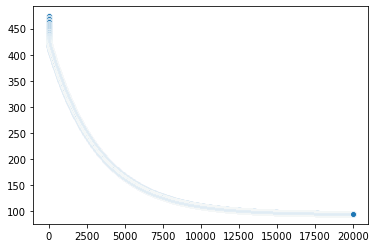

In [6]:
numEpochs= 20000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise